In [1]:
import copy
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy.optimize import fsolve

In [2]:
def transform(G):
    dlist = dict(G.degree())
    N = len(dlist)
    corr = np.zeros((N, N))
    p = np.zeros(N)

    for d in dlist:
        p[dlist[d]] += 1

    for e in G.edges:
        d0 = dlist[e[0]]
        d1 = dlist[e[1]]
        corr[d0, d1] = corr[d0, d1] + 1 / p[d0] / d0
        corr[d1, d0] = corr[d1, d0] + 1 / p[d1] / d1

    p = p / N

    idx = np.nonzero(p)[0]
    p = p[idx]
    corr = corr[idx][:, idx]
    return p, corr, idx


def first(p, C, s, Db):
    r = 1 + s
    p = p[:, None]
    if Db:
        D = (C * p).T # Db
    else:
        D = C * p #Bd
    B = np.sum(D, axis = 0)
    def f(x):
        return - 2 * r * np.matmul(D, x) + 2 * B * x + r * np.matmul(D, np.square(x)) + B * np.square(x)
    
    init = np.zeros(C.shape[0])
    init[0] = 1
    init = np.random.rand(C.shape[0])
    A, _, info, mes = fsolve(f, init, full_output = 1)
    while info != 1:
        init = np.random.rand(C.shape[0])
        A, _, info, mes = fsolve(f, init, full_output = 1)
    return A

def solve(p, C, s, N, Db = False):
    p = np.array(p)
    A = first(p, C, s, Db)
    while not np.prod(A > 1e-10):
        A = first(p, C, s, Db)

    return (1 - np.sum(p * np.exp(-A))) / (1 - np.exp(- N * np.sum(A * p))), A

In [3]:
path = "mv_graphs"
consts = []
approx  = []
data_g = []

for i in range(0, 1000):
    
    g = nx.read_edgelist(path + '/{:d}.txt'.format(i))
    N = len(g)
    p, corr, idx = transform(g)
        
    approx_bd = []
    approx_db = []

    for s in [0.05]:
        p_fix, A = solve(p, corr, s, N)
        approx_bd += [p_fix]
        
        p_fix, A = solve(p, corr, s, N, True)
        approx_db += [p_fix]
        
        
    const = p.T @ corr @ (1 / idx)[:,None] / (p.T @ corr @ (1 / idx**2)[:,None]) #* (1 / idx) @ p
    bd = (const / idx) @ p
    deg = np.array(g.degree)[:,1].astype(int)  

    mean = np.mean(deg)
    var = np.var(deg)
    db = mean ** 2 / (mean ** 2 + var)
        
    consts += [(bd, db)]
    
    approx += [approx_bd + approx_db]        
    data_g += [(mean,var)]
    
    print(i, mean)
    
data_g = np.array(data_g)
approx = np.array(approx)
#print(N)

0 1.98
1 1.98
2 1.98
3 1.98
4 1.98
5 1.98
6 1.98
7 1.98
8 1.98
9 1.98
10 1.98
11 1.98
12 1.98
13 1.98
14 1.98
15 1.98
16 1.98
17 1.98
18 1.98
19 1.98
20 1.98
21 1.98
22 1.98
23 1.98
24 1.98
25 1.98
26 1.98
27 1.98
28 1.98
29 1.98
30 1.98
31 1.98
32 1.98
33 1.98
34 1.98
35 1.98
36 1.98
37 1.98
38 1.98
39 1.98
40 1.98
41 1.98
42 1.98
43 1.98
44 1.98
45 1.98
46 1.98
47 1.98
48 1.98
49 1.98
50 1.98
51 1.98
52 1.98
53 1.98
54 1.98
55 1.98
56 1.98
57 1.98
58 1.98
59 1.98
60 1.98
61 1.98
62 1.98
63 1.98
64 1.98
65 1.98
66 1.98
67 1.98
68 1.98
69 1.98
70 1.98
71 1.98
72 1.98
73 1.98
74 1.98
75 1.98
76 1.98
77 1.98
78 1.98
79 1.98
80 1.98
81 1.98
82 1.98
83 1.98
84 1.98
85 1.98
86 1.98
87 1.98
88 1.98
89 1.98
90 1.98
91 1.98
92 1.98
93 1.98
94 1.98
95 1.98
96 1.98
97 1.98
98 1.98
99 1.98
100 1.98
101 1.98
102 1.98
103 1.98
104 1.98
105 1.98
106 1.98
107 1.98
108 1.98
109 1.98
110 1.98
111 1.98
112 1.98
113 1.98
114 1.98
115 1.98
116 1.98
117 1.98
118 1.98
119 1.98
120 1.98
121 1.98
122 1.98
123

929 50.7
930 50.7
931 50.7
932 50.7
933 50.7
934 50.7
935 50.7
936 50.7
937 50.7
938 50.7
939 50.7
940 50.7
941 50.7
942 50.7
943 50.7
944 50.7
945 50.7
946 50.7
947 50.7
948 50.7
949 50.7
950 50.7
951 50.7
952 50.7
953 50.7
954 50.7
955 50.7
956 50.7
957 50.7
958 50.7
959 50.7
960 50.7
961 50.7
962 50.7
963 50.7
964 50.7
965 50.7
966 50.7
967 50.7
968 50.7
969 50.7
970 50.7
971 50.7
972 50.7
973 50.7
974 50.7
975 50.7
976 50.7
977 50.7
978 50.7
979 50.7
980 50.7
981 50.7
982 50.7
983 50.7
984 50.7
985 50.7
986 50.7
987 50.7
988 50.7
989 50.7
990 50.7
991 50.7
992 50.7
993 50.7
994 50.7
995 50.7
996 50.7
997 50.7
998 50.7
999 50.7


In [6]:
path = "mv_"
n = 3
m = 1000

length = n * m 

stats = np.zeros((length, 3))
stats1 = np.loadtxt(path + "results_Bd.txt")
stats[:, [0,2]] =  stats1[:, [0, 4]]
stats[:, 1] = stats1[:,2] / (stats1[:,1] + stats1[:,2])
stats = stats[list(range(0, length,3)) + list(range(1,length,3)) + list(range(2,length,3))]
stats[np.where(stats[:,0] == 0)[0]] = np.nan


stats_db = np.zeros((length, 3))
stats1 = np.loadtxt(path + "results_dB.txt")
stats_db[:, [0,2]] =  stats1[:, [0, 4]]
stats_db[:, 1] = stats1[:,2] / (stats1[:,1] + stats1[:,2])
stats_db = stats_db[list(range(0, length,3)) + list(range(1,length,3)) + list(range(2,length,3))]
stats_db[np.where(stats_db[:,0] == 0)[0]] = np.nan


#meanvar = np.loadtxt(path + "info.txt")
#control = np.loadtxt("wellmixed100_bD.txt")
#control = [control[:,0], control[:,2] / (control[:,2] + control[:,1]), control[:,4]]
#control = np.array(control).T

C:\Users\Yang Ping\AppData\Local\Temp\ipykernel_12544\4012049810.py:10: RuntimeWarning: invalid value encountered in true_divide
  stats[:, 1] = stats1[:,2] / (stats1[:,1] + stats1[:,2])
C:\Users\Yang Ping\AppData\Local\Temp\ipykernel_12544\4012049810.py:18: RuntimeWarning: invalid value encountered in true_divide
  stats_db[:, 1] = stats1[:,2] / (stats1[:,1] + stats1[:,2])


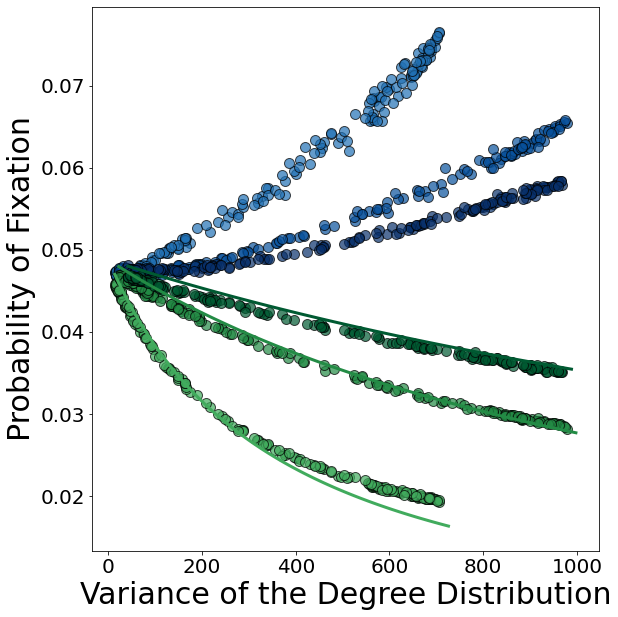

In [30]:
#path = "/Users/yangpink/Desktop/plots/"
consts = np.array(consts)
approx_sim = (1 - np.exp(-consts * 0.05)) / (1 - np.exp(-1000 * consts * 0.05))

N = 100
plt.figure(figsize=(20,10))
i = 1000

c = np.array([1e-2, 5e-2, 1e-1])
c = (1 - 1 / (1 + c)) / (1 - 1 / np.power(1 + c, N))

c_list = ['#6baed6', '#4292c6', '#2171b5', '#08519c', '#08306b']
c_list2 = ['#a1d99b','#74c476', '#41ab5d', '#238b45', '#005a32']


plt.subplot(121)
for j in range(2,5):
    idx_start, idx_end = 200 * j, 200 * (j + 1)
    plt.scatter(data_g[idx_start:idx_end,1], stats[i + idx_start:i + idx_end,1], alpha = 0.7, 
                c = c_list[j], #label = 'Bd, mean = {:g}'.format(np.round(meanvar[idx_start,0])), 
                s=100, linewidth = 1.0, edgecolor= 'k')

for j in range(2,5):
    idx_start, idx_end = 200 * j, 200 * (j + 1)
    x, y = data_g[idx_start:idx_end,1], stats_db[i + idx_start:i + idx_end,1]
    plt.scatter(x, y, alpha = 0.7, 
                c = c_list2[j], #label = 'dB, mean = {:g}'.format(np.round(meanvar[idx_start,0])), 
                s=100, linewidth = 1.0, edgecolor= 'k')
    
    var = np.linspace(x.min(), x.max() + 20, 100)
    consts = data_g[idx_start,0] ** 2 / (data_g[idx_start,0] ** 2 
                                    + var)
    
    approx_sim = (1 - np.exp(-consts * 0.05)) / (1 - np.exp(-1000 * consts * 0.05))
    plt.plot(var, approx_sim, c = c_list2[j], linewidth = 3)
    
    
plt.ylabel('Probability of Fixation', fontsize=30)
plt.xlabel('Variance of the Degree Distribution', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.ylim(0.01, 0.09)

####################################

#plt.savefig('var_approx.svg', fmt = 'svg', bbox_inches= "tight", pad_inches=0.1)
plt.show()

In [18]:
const = data_g[idx_start,0] ** 2 / (data_g[idx_start,0] ** 2 
                                    + np.linspace(0,800) )



In [1]:
import copy
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

sns.set()
sns.set_style("white")

import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

c = ['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#d5ff2e',
 '#88419d',
 '#045a8d',
 '#ccb974',
 '#64b5cd']
sns.set_palette(c)

In [2]:
def transform(G):
    dlist = dict(G.degree())
    N = len(dlist)
    corr = np.zeros((N, N))
    p = np.zeros(N)

    for d in dlist:
        p[dlist[d]] += 1

    for e in G.edges:
        d0 = dlist[e[0]]
        d1 = dlist[e[1]]
        corr[d0, d1] = corr[d0, d1] + 1 / p[d0] / d0
        corr[d1, d0] = corr[d1, d0] + 1 / p[d1] / d1

    p = p / N

    idx = np.nonzero(p)[0]
    p = p[idx]
    corr = corr[idx][:, idx]
    return p, corr, idx

In [4]:
df = pd.read_pickle(path + "paper_data.pkl")
df_1000 = df.loc[df[('Graph Info', 'Size')].values.astype(int) == 1000]

temp = df.loc[df[('Graph Info', 'Type')] == 'Preferential']

In [5]:
count = 200

data_bd = np.zeros((3*count,3))
raw_bd = np.loadtxt(path + 'bag_results_bd.txt')[:3*count,:]
data_bd[:,0] = raw_bd[:,0]
data_bd[:,1] = raw_bd[:,2] / (raw_bd[:,1] + raw_bd[:,2])
data_bd[:,2] = raw_bd[:,4]
data_bd[np.where(data_bd[:,2] == 0)[0], 2] = np.nan


#######

data_db = np.zeros((3*count,3))

raw_db = np.loadtxt(path + 'bag_results_db.txt')[:3*count,:]

data_db[:,0] = raw_db[:,0]
data_db[:,1] = raw_db[:,2] / (raw_db[:,1] + raw_db[:,2])
data_db[:,2] = raw_db[:,4]
data_db[np.where(data_db[:,2] == 0)[0], 2] = np.nan


control = (1 - np.power(1.01, -1)) /  (1 - np.power(1.01, -1000))

/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_28844/1792008809.py:6: RuntimeWarning: invalid value encountered in divide
  data_bd[:,1] = raw_bd[:,2] / (raw_bd[:,1] + raw_bd[:,2])
/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_28844/1792008809.py:18: RuntimeWarning: invalid value encountered in divide
  data_db[:,1] = raw_db[:,2] / (raw_db[:,1] + raw_db[:,2])


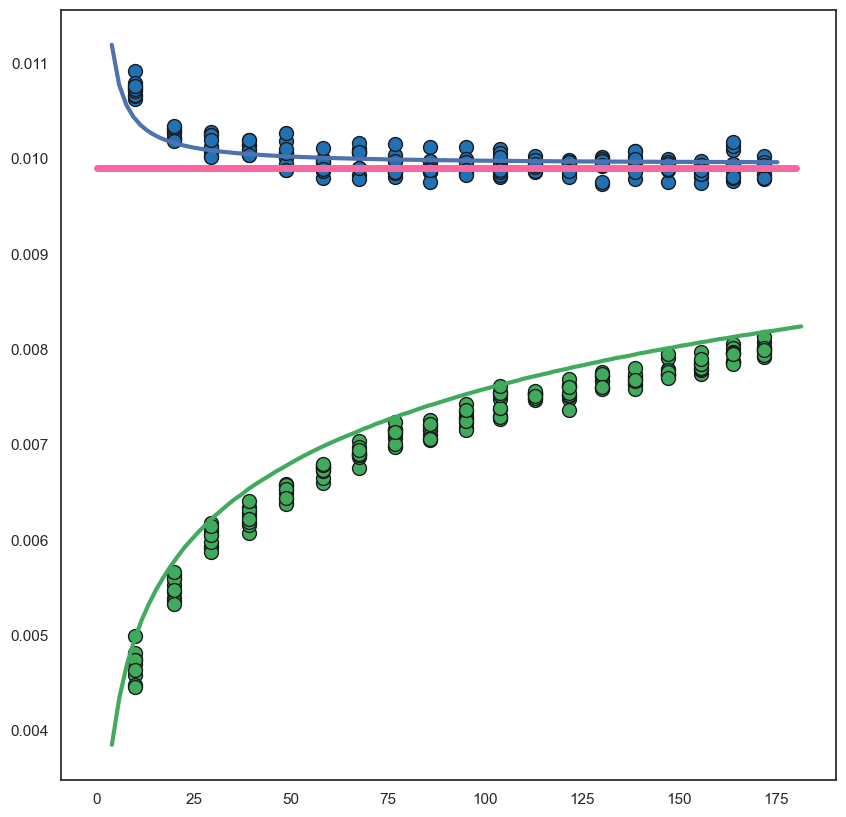

In [13]:
x = np.array(temp[('Degree distribution', 'First')].iloc[-200:])

plt.figure(figsize=(10,10))

app = lambda x : (1 - np.exp(-x * 0.01)) / (1 - np.exp(-1000 * x * 0.01))

plt.plot([0,180], 2 * [control], color = '#f768a1', 
         linewidth=5.0, label = 'Well-mixed')

plt.scatter(x, data_bd[::3,1], c = '#2171b5', label = 'Bd', s=100, linewidth = 1.0, edgecolor= 'k')
plt.plot(consts_bd[:,0], app(consts_bd[:,1]), linewidth=3.0)

plt.scatter(x, data_db[::3,1], c = '#41ab5d', label = 'dB', s=100, linewidth = 1.0, edgecolor= 'k')
plt.plot(consts_db[:,0], app(consts_db[:,1]), c = '#41ab5d', linewidth=3.0)


In [9]:
from scipy.special import comb
                   
    
def pa_corr(k, l, m):
    c = comb(2 * m + 2, m + 1) * comb(k + l - 2 * m, l - m) / comb(k + l + 2, l + 1)
    return m * (k + 2) / (k * l * (l + 1)) * (1 -c)
    #return 2 * m * (m + 1) / (k * (k + 1) * l * (l + 1)) * (1 - c)

def bd_pa_const(m):
    delta_m = 100
    k = np.arange(m, m + delta_m)
    nk = (2 * m * (m+1) / (k * (k+1) * (k + 2)) )
    p_k = nk / nk.sum()
    
    idx = np.arange(m, m + delta_m)
    
    k, l = np.meshgrid(idx, idx)
    k, l = k.ravel(), l.ravel()

    p_kl = pa_corr(k, l, m)
    p_kl = p_kl.reshape((delta_m,-1)).T

    const = p_k.T @ p_kl @ (1 / idx)[:,None] / (p_k.T @ p_kl @ (1 / idx**2)[:,None]) #* (1 / idx) @ p
    const = (const / idx) @ p_k

    return (p_k * idx).sum(), const

In [10]:
consts_db = []
N = 1000
for m in range(2,110):
    k = np.arange(m, N)
    nk = (2 * m * (m+1) / (k * (k+1) * (k + 2)) )
    cap = 80 + int(np.sqrt(2 * N * m))
    
    nk, k = nk[:cap - m], k[:cap - m]
    
    nk = nk / nk.sum()
    mean = (nk * k).sum()
    var = (nk * (k - mean)**2).sum()
    consts_db += [[mean, mean ** 2 / (var + mean ** 2)]]
    
consts_db = np.array(consts_db)

In [11]:
consts_bd = [bd_pa_const(m) for m in range(2,140)]
consts_bd = np.array(consts_bd)

In [12]:
consts_bd

array([[  3.88571429,   1.12550472],
       [  5.77570093,   1.08327507],
       [  7.63302752,   1.06187903],
       [  9.45945946,   1.04907802],
       [ 11.25663717,   1.0405952 ],
       [ 13.02608696,   1.03457275],
       [ 14.76923077,   1.03008002],
       [ 16.48739496,   1.02660138],
       [ 18.18181818,   1.02382877],
       [ 19.85365854,   1.02156713],
       [ 21.504     ,   1.01968704],
       [ 23.13385827,   1.01809932],
       [ 24.74418605,   1.01674056],
       [ 26.33587786,   1.01556444],
       [ 27.90977444,   1.01453635],
       [ 29.46666667,   1.01362989],
       [ 31.00729927,   1.01282463],
       [ 32.5323741 ,   1.01210444],
       [ 34.04255319,   1.01145649],
       [ 35.53846154,   1.01087039],
       [ 37.02068966,   1.01033765],
       [ 38.48979592,   1.0098513 ],
       [ 39.94630872,   1.00940552],
       [ 41.39072848,   1.00899542],
       [ 42.82352941,   1.00861688],
       [ 44.24516129,   1.0082664 ],
       [ 45.65605096,   1.00794096],
 